In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, TerminateOnNaN
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset2\dataset3_train.csv")
test = pd.read_csv(r"H:\Sem-7\CS5691\Assignment-3\Datasets\Dataset2\dataset3_test.csv")

x_train = train[['x1', 'x2', 'x3']].to_numpy(dtype=np.float32)
y_train = train[['y1', 'y2', 'y3']].to_numpy(dtype=np.float32)
x_test = test[['x1', 'x2', 'x3']].to_numpy(dtype=np.float32)
y_test = test[['y1', 'y2', 'y3']].to_numpy(dtype=np.float32)

In [3]:
def mse0(y_true, y_pred): return tf.reduce_mean(tf.square(y_true[:, 0] - y_pred[:, 0]))
def mse1(y_true, y_pred): return tf.reduce_mean(tf.square(y_true[:, 1] - y_pred[:, 1]))
def mse2(y_true, y_pred): return tf.reduce_mean(tf.square(y_true[:, 2] - y_pred[:, 2]))

sgd = SGD(learning_rate=0.07, momentum=0.9, clipnorm=1.0)

model = Sequential([
    Dense(15, activation="tanh", input_shape=(x_train.shape[1],)),
    Dense(10, activation="tanh"),
    Dense(3, activation="linear")
])
model.compile(optimizer=sgd, loss="mse", metrics=[mse0, mse1, mse2])

hist = model.fit(
    x_train, y_train,
    batch_size=8,
    epochs=200,
    shuffle=True,
    verbose=True
).history


Epoch 1/200


c:\Users\hrush\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5074 - mse0: 0.6415 - mse1: 0.4179 - mse2: 0.4598
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2450 - mse0: 0.2336 - mse1: 0.2806 - mse2: 0.2212
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2213 - mse0: 0.2194 - mse1: 0.2336 - mse2: 0.2097
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2248 - mse0: 0.2429 - mse1: 0.2254 - mse2: 0.2054
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2281 - mse0: 0.2390 - mse1: 0.2359 - mse2: 0.2081
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2055 - mse0: 0.2196 - mse1: 0.2144 - mse2: 0.1828
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2048 - mse0: 0.2090 - mse1: 0.2046 - mse2: 0.2000
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2123 - mse0: 0.1986 - mse1: 0.2075 - mse2: 0.2311
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2010 - mse0: 0.2253 - mse1: 0.2011 - mse2: 0.1762
Epoch 10/200


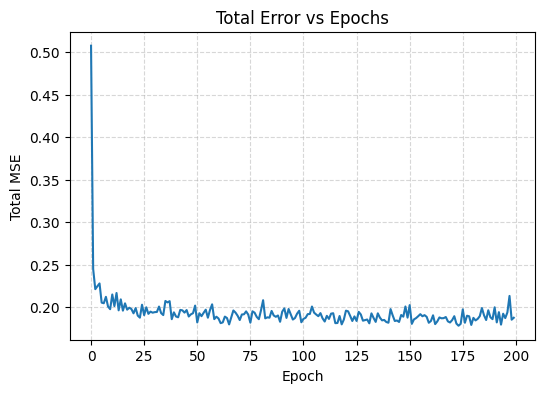

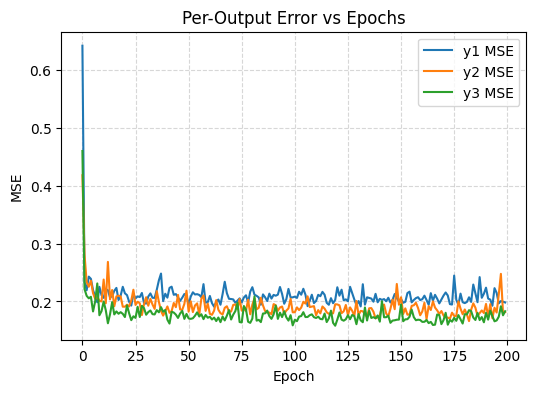

In [6]:

plt.figure(figsize=(6,4))
plt.plot(hist["loss"])
plt.xlabel("Epoch")
plt.ylabel("Total MSE")
plt.title("Total Error vs Epochs")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(hist["mse0"], label="y1 MSE")
plt.plot(hist["mse1"], label="y2 MSE")
plt.plot(hist["mse2"], label="y3 MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Per-Output Error vs Epochs")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


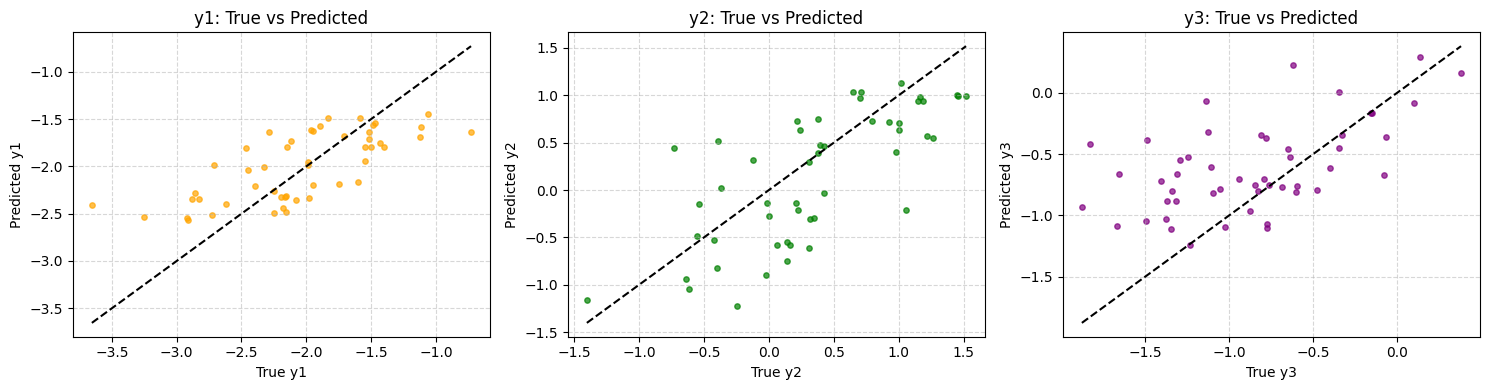

In [7]:
y_pred_test = model.predict(x_test, verbose=0)
mse_total = tf.reduce_mean(tf.square(y_test - y_pred_test), axis=1)

mse_y1 = tf.reduce_mean(tf.square(y_test[:, 0] - y_pred_test[:, 0]))
mse_y2 = tf.reduce_mean(tf.square(y_test[:, 1] - y_pred_test[:, 1]))
mse_y3 = tf.reduce_mean(tf.square(y_test[:, 2] - y_pred_test[:, 2]))

total_mse = tf.reduce_mean(mse_total).numpy()
y_errors = [mse_y1.numpy(), mse_y2.numpy(), mse_y3.numpy()]

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(y_test[:,0], y_pred_test[:,0], s=15, color='orange', alpha=0.7)
plt.plot([y_test[:,0].min(), y_test[:,0].max()],
         [y_test[:,0].min(), y_test[:,0].max()], 'k--')
plt.xlabel("True y1")
plt.ylabel("Predicted y1")
plt.title("y1: True vs Predicted")
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1,3,2)
plt.scatter(y_test[:,1], y_pred_test[:,1], s=15, color='green', alpha=0.7)
plt.plot([y_test[:,1].min(), y_test[:,1].max()],
         [y_test[:,1].min(), y_test[:,1].max()], 'k--')
plt.xlabel("True y2")
plt.ylabel("Predicted y2")
plt.title("y2: True vs Predicted")
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1,3,3)
plt.scatter(y_test[:,2], y_pred_test[:,2], s=15, color='purple', alpha=0.7)
plt.plot([y_test[:,2].min(), y_test[:,2].max()],
         [y_test[:,2].min(), y_test[:,2].max()], 'k--')
plt.xlabel("True y3")
plt.ylabel("Predicted y3")
plt.title("y3: True vs Predicted")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [8]:
# Evaluate model on the test set
test_loss, test_mse0, test_mse1, test_mse2 = model.evaluate(x_test, y_test, verbose=0)

print(f"Total Test MSE (overall loss): {test_loss:.4f}")
print(f"Test MSE for output 0: {test_mse0:.4f}")
print(f"Test MSE for output 1: {test_mse1:.4f}")
print(f"Test MSE for output 2: {test_mse2:.4f}")


Total Test MSE (overall loss): 0.2421
Test MSE for output 0: 0.1863
Test MSE for output 1: 0.2957
Test MSE for output 2: 0.2697
